In [3]:
import pandas as pd

wine_df = pd.read_csv('../wines.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0,5
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0,6
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0,6
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0,6
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0,7
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1,6
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1,5


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.loc[:, 'fixed acidity':'color'], wine_df['quality'], test_size=0.25, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeRegressor

wine_tree = DecisionTreeRegressor(max_depth=3)

wine_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [8]:
from sklearn import metrics

predicted = wine_tree.predict(X_test)
print(metrics.mean_absolute_error(y_test, predicted))

0.5894927147838183


[Text(0.5, 0.875, 'alcohol <= 10.625\nsquared_error = 0.761\nsamples = 4872\nvalue = 5.808'),
 Text(0.25, 0.625, 'volatile acidity <= 0.257\nsquared_error = 0.546\nsamples = 2885\nvalue = 5.515'),
 Text(0.125, 0.375, 'volatile acidity <= 0.207\nsquared_error = 0.564\nsamples = 1010\nvalue = 5.844'),
 Text(0.0625, 0.125, 'squared_error = 0.615\nsamples = 471\nvalue = 6.021'),
 Text(0.1875, 0.125, 'squared_error = 0.467\nsamples = 539\nvalue = 5.688'),
 Text(0.375, 0.375, 'volatile acidity <= 0.572\nsquared_error = 0.448\nsamples = 1875\nvalue = 5.339'),
 Text(0.3125, 0.125, 'squared_error = 0.434\nsamples = 1467\nvalue = 5.397'),
 Text(0.4375, 0.125, 'squared_error = 0.441\nsamples = 408\nvalue = 5.13'),
 Text(0.75, 0.625, 'alcohol <= 11.742\nsquared_error = 0.769\nsamples = 1987\nvalue = 6.232'),
 Text(0.625, 0.375, 'free sulfur dioxide <= 11.5\nsquared_error = 0.75\nsamples = 1125\nvalue = 6.028'),
 Text(0.5625, 0.125, 'squared_error = 0.998\nsamples = 192\nvalue = 5.547'),
 Text(0.68

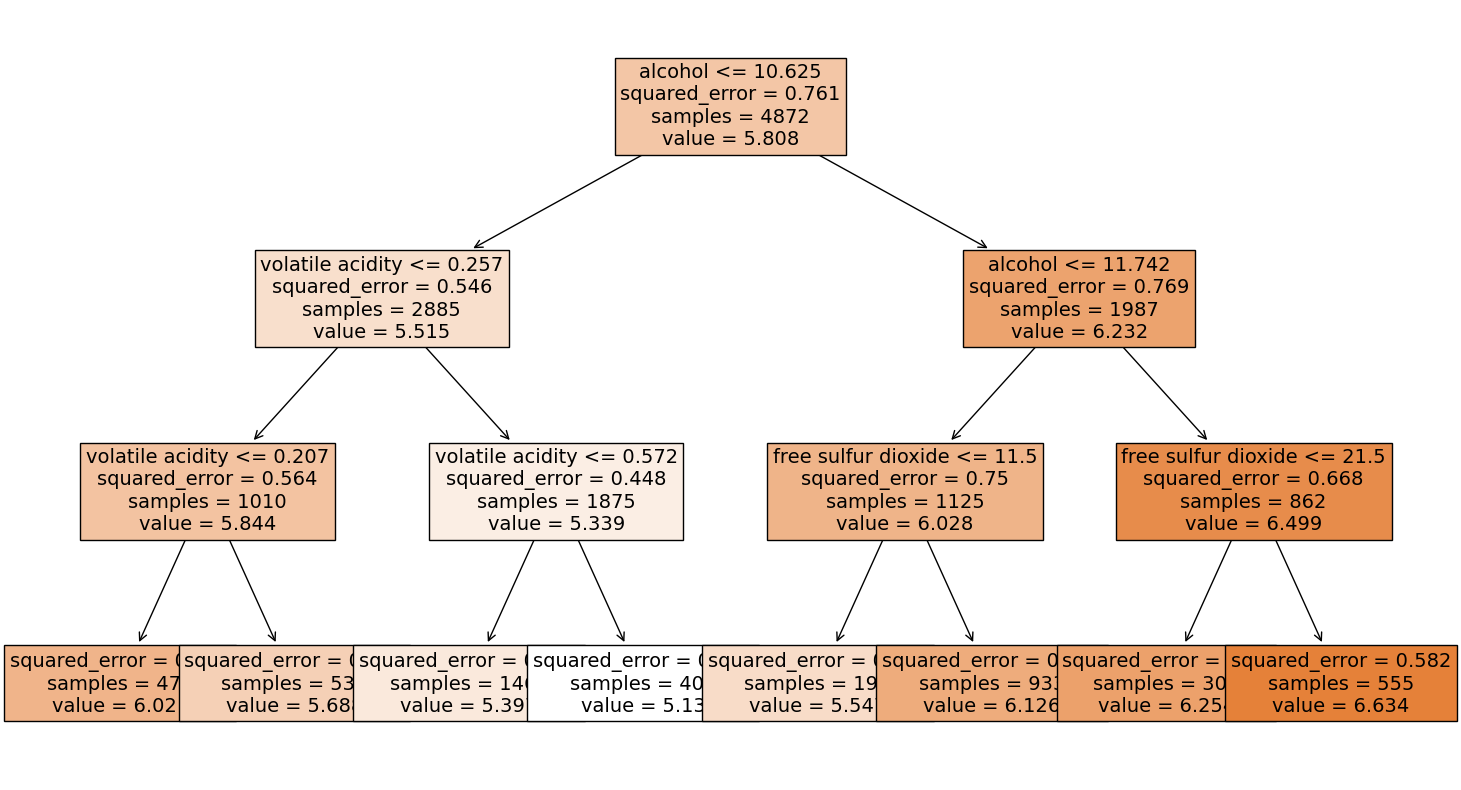

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18,10))
tree.plot_tree(wine_tree, feature_names=wine_df.columns[:-1], fontsize=14, filled=True)

In [13]:
from io import StringIO
from IPython.display import Image
import pydotplus


In [20]:
dot_data = StringIO()
tree.export_graphviz(wine_tree, out_file=dot_data, feature_names=wine_df.columns[:-1],filled=True, special_characters=True )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

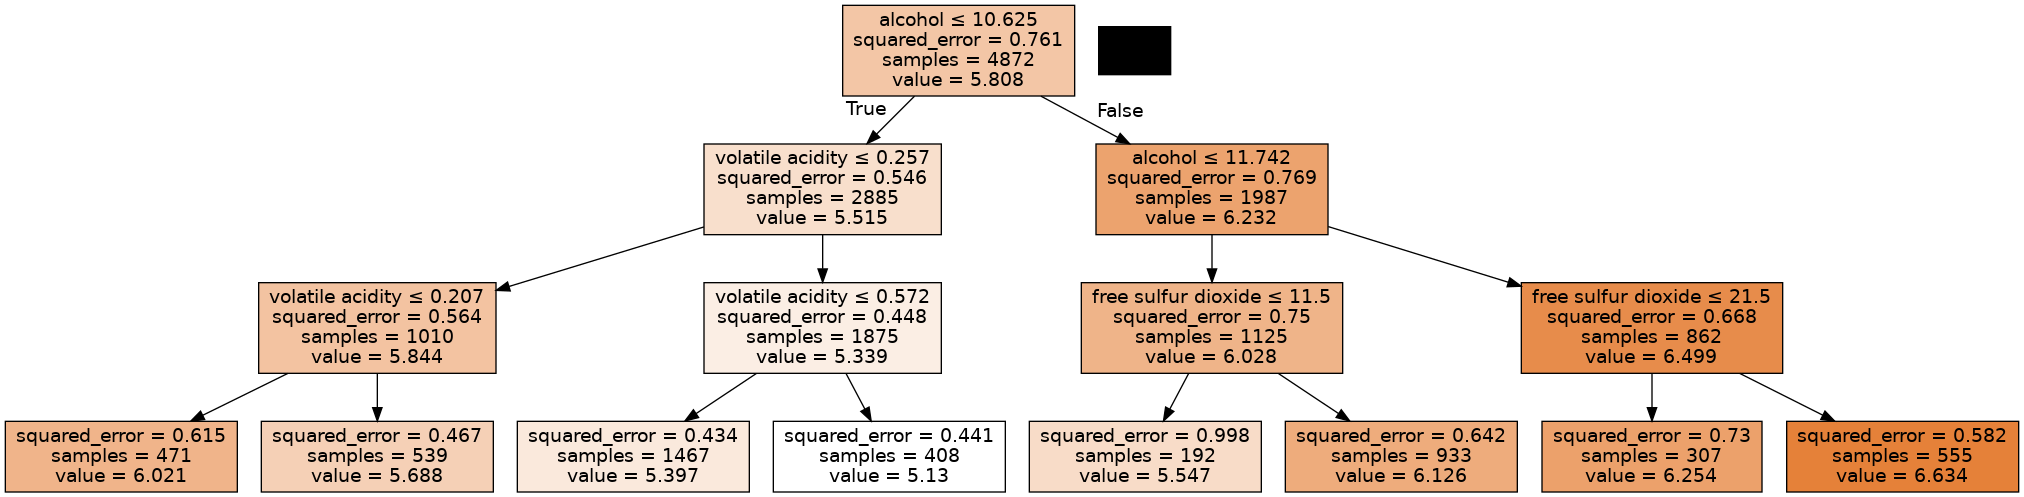

In [22]:
Image(graph.create_png())

In [26]:
feature_names = list(wine_df.loc[:, 'fixed acidity':'color'].columns)
print(tree.export_text(wine_tree, feature_names=feature_names))

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.26
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- value: [6.02]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- value: [5.69]
|   |--- volatile acidity >  0.26
|   |   |--- volatile acidity <= 0.57
|   |   |   |--- value: [5.40]
|   |   |--- volatile acidity >  0.57
|   |   |   |--- value: [5.13]
|--- alcohol >  10.62
|   |--- alcohol <= 11.74
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- value: [5.55]
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- value: [6.13]
|   |--- alcohol >  11.74
|   |   |--- free sulfur dioxide <= 21.50
|   |   |   |--- value: [6.25]
|   |   |--- free sulfur dioxide >  21.50
|   |   |   |--- value: [6.63]

